# Analyse sensorielle: contexte

Une entreprise de chocolats souhaite savoir comment sont perçus différents chocolats qu'elle a mis au point en vue de leur mise sur le marché. L'objectif est d'avoir un aperçu de la perception potentielle qu'aura le grand public de ces chocolats : sont-ils trop amers ? Trop laiteux ? Pas assez sucrés ?

A terme, l'entreprise cherche à profiler ses chocolats pour bien cibler la clientèle à laquelle ils vont adresser ces chocolats. Nous pouvons supposer par exemple que l'équipe Marketing de l'entreprise a déjà cerné certains profils comme les jeunes qui préfèrent plutôt les chocolats au lait que les chocolats noirs. Tout l'enjeu est donc de bien cerner les chocolats qui vont être mis sur le marché pour déterminer la bonne campagne de marketing pour chacun d'entre eux.

# Première exploration du jeu de données:

In [24]:
import pandas as pd

In [25]:
df= pd.read_excel("Chocolate.xlsx")

In [26]:
df.head()

,Panelist,Session,Rank,Product,CocoaA,MilkA,CocoaF,MilkF,Caramel,Vanilla,Sweetness,Acidity,Bitterness,Astringency,Crunchy,Melting,Sticky,Granular,Unnamed: 18
0,0,1,1,1,choc6,7,6,6,5,5,3,7,2,4,5,8,3,4,3.0
1,1,1,1,6,choc3,6,7,2,7,8,4,7,2,2,3,3,8,6,5.0
2,2,1,1,3,choc2,8,6,5,4,7,4,5,5,6,6,7,5,4,3.0
3,3,1,1,5,choc1,7,8,8,3,3,2,4,7,8,6,3,2,3,5.0
4,4,1,1,2,choc4,8,5,4,4,4,4,5,6,6,4,6,3,7,3.0


In [27]:
df.shape

(348, 19)

Le jeu de données est constitué de plusieurs variables dont Product renseignant le nom du chocolat testé. Celui-ci compte aussi 3 autres variables particulières :

Panelist : Indiquant le numéro de l'expert testé. Il y a en tout 29 experts qui ont goûté les chocolats et donc 29 numéros différents pour chacun.
Session : Indique quelle était la session concernée. Il y a eu en tout 2 sessions. Pour chacune d'entre elles les experts ont goûté et noté les 6 chocolats testés mais dans un ordre différent.
Rank : Indique la position du chocolat testé pendant la session. Par exemple, pour le premier expert pour la première session, le chocolat 6 a été testé en première position.
Les 14 variables restantes sont les 14 attributs évalués sur les différents chocolats :

CocoaA/CocoaF : mesure la teneur en Cacao.

MilkA/MilkF : mesure la teneur en lait.
Caramel : mesure la teneur en Caramel.
Vanilla : mesure la teneur en Vanille.
Sweetness : mesure la douceur du chocolat.
Acidity : mesure l'acidité du chocolat.
Bitterness : mesure l'amertume du chocolat.
Astringency : mesure l'Astringence du chocolat.
Crunchy : mesure le croquant du chocolat.
Melting : mesure le fondant du chocolat.
Sticky : mesure le collant du chocolat.
Granular : mesure la granularité du chocolat.
Nous allons dans un premier temps explorer nos données pour chercher à déterminer à priori le profil de certains des chocolats que nous avons à disposition.

In [28]:
df = df.drop("Unnamed: 18", axis=1)

In [29]:
# Vérifions que le DataFrame df ne contient pas de valeurs manquantes
df.isna().sum()

Panelist       0
Session        0
Rank           0
Product        0
CocoaA         0
MilkA          0
CocoaF         0
MilkF          0
Caramel        0
Vanilla        0
Sweetness      0
Acidity        0
Bitterness     0
Astringency    0
Crunchy        0
Melting        0
Sticky         0
Granular       0
dtype: int64

Avant de commencer l'étude de nos données nous avons besoin de juger de la pertinence de celle-ci. Nous avons pour chacun de nos experts et chacun de nos produits testé les notes sur les différents attributs. Supposons par exemple que d'un expert à l'autre, d'un chocolat à l'autre nous ne notons aucune différence dans les notes des attributs, l'étude n'aurait alors plus aucun intérêt. Nous avons besoin de nous assurer que d'un expert à l'autre et d'un chocolat à l'autre nous avons bien des différences significatives dans les notes de chacun des attributs.

Pour vérifier cette information nous allons devoir réaliser une analyse de la variance à deux facteurs.

In [30]:
df.dtypes

Panelist        int64
Session         int64
Rank            int64
Product         int64
CocoaA         object
MilkA           int64
CocoaF          int64
MilkF           int64
Caramel         int64
Vanilla         int64
Sweetness       int64
Acidity         int64
Bitterness      int64
Astringency     int64
Crunchy         int64
Melting         int64
Sticky          int64
Granular        int64
dtype: object

Pour chaque expert et pour chaque chocolats testés nous avons bien des différences significatives dans les notations sur les différents attributs. C'est une bonne nouvelle pour cette étude car cela veut dire que nos experts et nos chocolats présentent bien des particularités que nous analyserons par la suite.

Pour le moment nous avons les notes de chaque individu pour chaque session pour chaque produit. Pour faire une étude approfondie nous allons avoir besoin de changer d'échelle et d'étudier un jeu de données avec pour un chocolat les notes moyennes obtenues pour chaque attribut.

In [47]:
choco = df.drop(['Panelist','Session','Rank'], axis = 1)

choco = choco.groupby(['CocoaA']).mean()
choco.head()

,Product,MilkA,CocoaF,MilkF,Caramel,Vanilla,Sweetness,Acidity,Bitterness,Astringency,Crunchy,Melting,Sticky,Granular
CocoaA,,,,,,,,,,,,,,
choc1,3.586207,7.086207,3.586207,8.068966,1.568966,1.672414,1.103448,3.137931,4.655172,7.068966,4.758621,5.965517,4.741379,3.758621
choc2,3.465517,6.551724,4.000000,6.913793,2.379310,2.775862,1.810345,4.620690,3.137931,4.948276,3.155172,7.706897,4.327586,3.827586
choc3,3.482759,4.672414,6.051724,3.379310,7.706897,6.327586,3.672414,7.603448,1.568966,1.396552,1.206897,2.982759,7.310345,5.034483
choc4,3.551724,6.258621,4.103448,6.689655,2.586207,2.672414,2.120690,4.293103,3.931034,5.189655,3.689655,6.103448,4.379310,4.103448
choc5,3.413793,6.793103,4.172414,6.793103,3.120690,3.413793,1.793103,5.224138,3.086207,4.879310,3.103448,6.637931,4.741379,3.224138


Affichons à l'aide de boîtes à moustache la distribution de chacun des attributs.

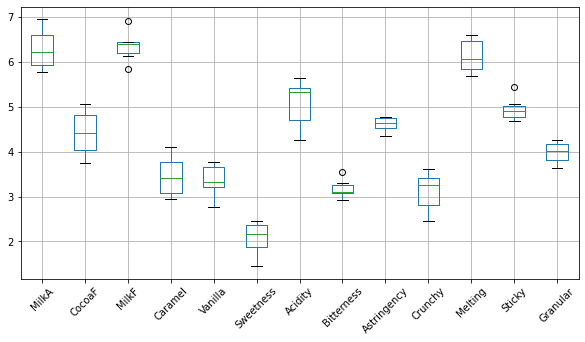

In [31]:
import matplotlib.pyplot as plt 

choco.boxplot(figsize = (10,5), rot=45);

Les distributions des attributs sont intéressantes, dans de nombreux cas comme pour CocoaA, CocoaF ou encore MilkF. Par exemple, nous avons souvent deux chocolats qui se démarquent avec une teneur plus élevée ou plus faible. Une question pertinente à nous poser est de déterminer si les deux chocolats concernés sont les mêmes pour chaque attribut.

Tout l'enjeu est de déterminer si nous avons deux chocolats qui ont été identifiés comme particulier par nos experts et qui se démarquent des autres chocolats sur de nombreux attributs comme CocoaA, CocoaF ou encore MilkF par exemple.

In [32]:
display(choco.idxmax().to_frame())
display(choco.idxmin().to_frame())

,0
MilkA,1
CocoaF,2
MilkF,1
Caramel,5
Vanilla,2
Sweetness,3
Acidity,5
Bitterness,3
Astringency,4
Crunchy,5


,0
MilkA,2
CocoaF,3
MilkF,2
Caramel,1
Vanilla,1
Sweetness,1
Acidity,4
Bitterness,4
Astringency,3
Crunchy,1


In [48]:
choco.head()

,Product,MilkA,CocoaF,MilkF,Caramel,Vanilla,Sweetness,Acidity,Bitterness,Astringency,Crunchy,Melting,Sticky,Granular
CocoaA,,,,,,,,,,,,,,
choc1,3.586207,7.086207,3.586207,8.068966,1.568966,1.672414,1.103448,3.137931,4.655172,7.068966,4.758621,5.965517,4.741379,3.758621
choc2,3.465517,6.551724,4.000000,6.913793,2.379310,2.775862,1.810345,4.620690,3.137931,4.948276,3.155172,7.706897,4.327586,3.827586
choc3,3.482759,4.672414,6.051724,3.379310,7.706897,6.327586,3.672414,7.603448,1.568966,1.396552,1.206897,2.982759,7.310345,5.034483
choc4,3.551724,6.258621,4.103448,6.689655,2.586207,2.672414,2.120690,4.293103,3.931034,5.189655,3.689655,6.103448,4.379310,4.103448
choc5,3.413793,6.793103,4.172414,6.793103,3.120690,3.413793,1.793103,5.224138,3.086207,4.879310,3.103448,6.637931,4.741379,3.224138


Nous allons:
Importer la librairie prince.
Implémenter une ACP avec deux composantes principales sur notre jeu de données choco

In [49]:
import prince

pca = prince.PCA(n_components=2)
pca = pca.fit(choco)

No handles with labels found to put in legend.


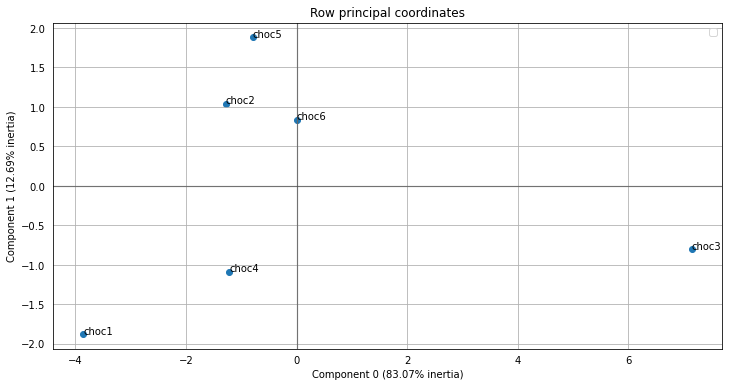

In [50]:
ax = pca.plot_row_coordinates(choco,
                               ax=None,
                               figsize=(12, 6),
                               x_component=0,
                               y_component=1,
                               labels=choco.index)

In [51]:
pca.column_correlations(choco)

,0,1
Acidity,0.961310,0.247505
Astringency,-0.979998,-0.159554
Bitterness,-0.910408,-0.379518
Caramel,0.993635,-0.047986
CocoaF,0.993710,-0.028852
Crunchy,-0.951703,-0.287947
Granular,0.812606,-0.502855
Melting,-0.772775,0.527226
MilkA,-0.970547,0.181201
MilkF,-0.997256,0.009472


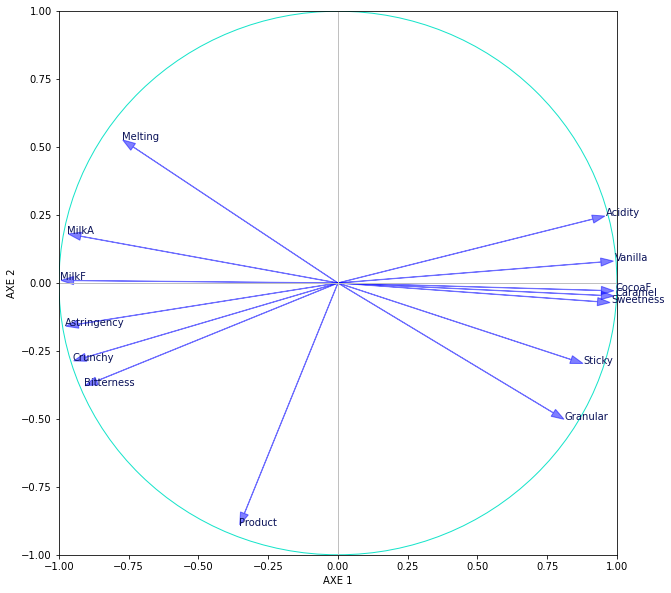

In [52]:
corr = pca.column_correlations(choco)

# Délimitation de la figure
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Affichage des variables
for j in choco.columns:
    plt.annotate(j, (corr.loc[j, 0], corr.loc[j, 1]), color='#091158')
    plt.arrow(0, 0, corr.loc[j, 0]*0.95, corr.loc[j, 1]*0.95, alpha=0.5, head_width=0.03, color='b')

# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Cercle et légendes
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2');

Commençons par le premier axe :

Les variables Acidity, Astringency, Bitterness, CocoaA, CocoaF et Granular sont presque entièrement négativement corrélées au premier axe. Cela signifie qu'un chocolat avec par exemple de fortes teneurs en cacao et amertume prendra de faibles valeurs sur le premier axe factoriel.
A l'inverse les variables Melting, MilkA, MilkF, Sweetness et Vanilla sont presque entièrement positivement corrélées au premier axe. Cela signifie qu'un chocolat identifié avec de fortes teneurs en lait et doux prendra de fortes valeurs sur le premier axe.
En croisant ces informations avec le graphe des individus plus haut si nous projetons nos points sur le premier axe factoriel nous constatons que celui-ci oppose les chocolats noirs comme le chocolat 3 perçu comme fort en cacao et le chocolat 1 perçu comme un chocolat au lait.

Nous pouvons effectuer le même travail sur le deuxième axe qui est moins évident. Les attributs Acidity, Melting, Crunchy et Sticky se démarquent positivement ou négativement. Le deuxième axe semble opposer la texture des chocolats qu'ils soient collant, fondant ou croquant.

Comme vous avez pu le constater en début de masterclass nous avons agrégé le jeu de données pour obtenir pour chaque attribut et chaque chocolat les notes moyennes obtenues. En faisant cela nous avons perdu la variabilité individuelle de chacun de nos experts. Une idée est d'effectuer des tirages avec remise sur le jeu de données df pour obtenir des jeux de données réechantillonnés de taille fixe et de les projeter dans les deux axes issus de l'ACP.

Pour réaliser cette tâche il nous suffit d'obtenir les coordonnées des chocolats notés par nos échantillons dans le plan issu de l'ACP en utilisant la méthode transform.

In [58]:
df.head()

,Panelist,Session,Rank,Product,CocoaA,MilkA,CocoaF,MilkF,Caramel,Vanilla,Sweetness,Acidity,Bitterness,Astringency,Crunchy,Melting,Sticky,Granular
0,0,1,1,1,choc6,7,6,6,5,5,3,7,2,4,5,8,3,4
1,1,1,1,6,choc3,6,7,2,7,8,4,7,2,2,3,3,8,6
2,2,1,1,3,choc2,8,6,5,4,7,4,5,5,6,6,7,5,4
3,3,1,1,5,choc1,7,8,8,3,3,2,4,7,8,6,3,2,3
4,4,1,1,2,choc4,8,5,4,4,4,4,5,6,6,4,6,3,7


In [57]:
df = df.drop("index", axis=1)

In [62]:
data = df.drop("CocoaA", axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler